
# Project: Investigation of No-Show Medical Appointments

> Project submission for Udacity Data Analyst Nano Degree Program

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

> Submitted By: Bharati Vinodkumar Malik

<a id='intro'></a>
## Introduction

The dataset under investigation is a collection of information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.Various characteristics about the patient are included such as Gender and Age as well as each individual's primary health designation(s) such as Hypertension, Alcoholism, and Diabetes. 

The dataset was originally sourced from <a href="https://www.kaggle.com/joniarroba/noshowappointments" target="_blank">Kaggle</a>. 
Udacity's version of the dataset (which this analysis has been conducted on) can be downloaded <a href="https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&ust=1513377859161000&usg=AFQjCNELJtHRQ9r28kGlBHv9nIUVIMalkQ" target="_blank">here</a>. 



#### Data Dictionary
<ul>
<li>01 - PatientId: Identification of a patient </li>
<li>02 - AppointmentID: Identification of each appointment </li>
<li>03 - Gender: Male or Female </li>
<li>04 - ScheduledDay: The day of the actual appointment, when they have to visit the doctor.</li>
<li>05 - AppointmentDay: The day someone called or registers for the appointment</li>
<li>06 - Age: How old is the patient.</li>
<li>07 - Neighbourhood: Where the appointment takes place.</li>
<li>08 - Scholarship: True of False . Observation, this is a broad topic, consider <a href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia" target="_blank">reading this article</a> </li>
<li>09 - Hipertension: True or False</li>
<li>10 - Diabetes: True or False</li>
<li>11 - Alcoholism: True or False</li>
<li>12 - Handcap: True or False</li>
<li>13 - SMS_received: 1 or more messages sent to the patient.</li>
<li>14 - No-show: True or False.</li>

Questions to be investigated:

* What is the proportion of appointment shows versus no shows?
* What is the breakdown of no-shows versus shows by patients that received SMS reminders?
* What is the patient health designation breakdown of no-shows versus shows?
* Which neighborhoods have the highest number of no-shows?
* Do appointment no-shows occur on specific days of the week?

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean  dataset for further analysis. 

#### Import data analysis packages

This investigation makes uses of the following data analytics packages:
 - Pandas. Provides flexible data structures designed to make working with “relational” or “labeled” data intuitive.
 - Numpy. Provides functions to create and manipulate numerical data with speed.
 - Matplotlib. Provide publication quality figures in a variety of formats with just a few lines of code.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

#### Load data into the Jupyter notebook

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#### Identifying the shape of the dataset

In [3]:
df.shape

(110527, 14)

#### Displaying 5 records from the dataset at a time

In [4]:
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
31085,4.496372e+10,5659674,F,2016-05-04T14:28:04Z,2016-05-17T00:00:00Z,72,BENTO FERREIRA,0,0,0,0,0,0,No
73099,2.667139e+13,5668173,F,2016-05-06T08:36:27Z,2016-05-19T00:00:00Z,64,BARRO VERMELHO,0,0,0,0,0,0,No
13235,4.239628e+13,5515678,F,2016-03-28T13:24:13Z,2016-05-12T00:00:00Z,26,ILHA DE SANTA MARIA,0,0,0,0,0,1,No
90957,6.871696e+14,5766029,F,2016-06-02T14:16:01Z,2016-06-02T00:00:00Z,30,SÃO CRISTÓVÃO,0,0,0,0,0,0,No
43307,3.725586e+11,5647073,M,2016-05-02T12:44:28Z,2016-05-05T00:00:00Z,13,CONSOLAÇÃO,0,0,0,0,0,1,Yes


> **Observations**: 
 - Using lower cases for column names and using underscores wherever applicable will make columns easier to read and work with
 - Rectifying column names
 - Changing no_show column from yes/no to 1/0 for easier analysis

#### Investigating if there are any duplicates in the dataset

In [5]:
print(sum(df.duplicated()))

0


> **Observations**:
 - No duplicate data exists.

#### Investigating few other details such as data-types, null values, etc

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> **Observations**: 
 - Changing PatientId data type from float to int will make the dataset easier to work with
 - Stripping time from the ScheduledDay and AppointmentDay column will make the dataset easier to work with

#### Step 6: Investigating Data Quality and other summary statistics

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Observations**:
 - Minimum Age appears as -1. Any such patient will be assumed to be a newborn or infant.

### Data Cleaning

#### Fixing column mispellings, incorporated underscores, and changed column names to be in lower case

In [8]:
new_labels = ['patient_id', 'appointment_id', 'gender', 'schedule_day', 'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns = new_labels
df.sample(5)

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
32189,5.934788e+12,5642576,F,2016-04-29T16:23:38Z,2016-05-31T00:00:00Z,27,MARIA ORTIZ,0,0,0,0,0,1,No
48485,1.833789e+09,5626318,F,2016-04-27T08:06:04Z,2016-05-16T00:00:00Z,61,JARDIM DA PENHA,0,1,0,0,0,0,No
27954,5.865682e+13,5651490,M,2016-05-03T08:53:39Z,2016-05-06T00:00:00Z,32,PRAIA DO SUÁ,0,0,0,0,0,0,No
83325,5.915789e+12,5599482,M,2016-04-19T09:00:24Z,2016-05-05T00:00:00Z,0,ITARARÉ,0,0,0,0,0,1,Yes
97190,3.815273e+13,5676767,F,2016-05-09T16:26:25Z,2016-06-07T00:00:00Z,71,MARIA ORTIZ,0,0,0,0,0,1,No


#### Converting patient_id data type from float to int

In [9]:
df['patient_id'] = df['patient_id'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
schedule_day       110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


#### Transforming the data type of the no_show field to integer

In [10]:
df["no_show"] = np.where((df.no_show=="Yes"), 1, 0)
df.head()

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


####  Changed schedule_day column from string to datetime and then stripped off the time component

In [11]:
df['schedule_day'] = pd.to_datetime(df['schedule_day']).apply(lambda x: x.strftime('%m-%d-%Y')) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
schedule_day       110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null int64
dtypes: int64(10), object(4)
memory usage: 11.8+ MB


####  Changed appointment_day column from string to datetime and then stripped off the time component

In [12]:
df['appointment_day'] = pd.to_datetime(df['appointment_day']).apply(lambda x: x.strftime('%m-%d-%Y')) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
schedule_day       110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null int64
dtypes: int64(10), object(4)
memory usage: 11.8+ MB


#### Creating appointment_dow and scheduled_dow column for day of week analysis

In [13]:
df['schedule_day'] = pd.to_datetime(df['schedule_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

df['schedule_dow'] = df['schedule_day'].dt.weekday_name
df['appointment_dow'] = df['appointment_day'].dt.weekday_name

In [14]:
df.head(2)

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the proportion of appointment shows versus no shows?

In [15]:
showed = df['no_show'] == 0 
not_showed = df['no_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed

In [16]:
df.head(2)

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow,showed,not_showed
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday,True,False
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday,True,False


In [17]:
app_status_df = df.groupby('no_show')['no_show'].agg(['count'])
app_status_df.reset_index(inplace=True)
app_status_df.columns = ['app_status', 'total']
app_status_df.iloc[0,0] = "No Show"
app_status_df.iloc[1,0] = "Show"
app_status_df.head()

,app_status,total
0,No Show,88208
1,Show,22319


In [18]:
no_show_prop = app_status_df.iloc[0,1] / (app_status_df.iloc[0,1] + app_status_df.iloc[1,1])
show_prop = app_status_df.iloc[1,1] / (app_status_df.iloc[0,1] + app_status_df.iloc[1,1])

In [19]:
app_status_df['proportion'] = [no_show_prop, show_prop]
app_status_df.head()

,app_status,total,proportion
0,No Show,88208,0.798067
1,Show,22319,0.201933


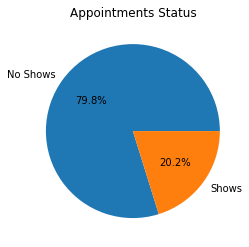

In [20]:
# Data to plot
labels = ['No Shows', 'Shows']
sizes = [no_show_prop, show_prop]

# The plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Appointments Status');

> Approximately, 79.8% of patients don't show-up for their appointments

### Research Question 2: What is the breakdown of no-shows versus shows by patients that received SMS reminders?

In [21]:
# Identifying the number of patients who didn't show up for their appointment despite receiving an sms reminder
ns_sr_y = df.query('no_show == "1"').query('sms_received == 1').shape[0]
ns_sr_y

9784

In [22]:
# Identifying the number of patients who did show up for their appointment and also received an sms reminder
s_sr_y = df.query('no_show == "0"').query('sms_received == 1').shape[0]
s_sr_y

25698

In [23]:
# Identifying the number of patients who didn't show up and who didn't receive an sms reminder
ns_sr_n = df.query('no_show == "1"').query('sms_received == 0').shape[0]
ns_sr_n

12535

In [24]:
# Identifying the number of patients who did show up for their appointment and who didn't receive an sms reminder
s_sr_n = df.query('no_show == "0"').query('sms_received == 0').shape[0]
s_sr_n

62510

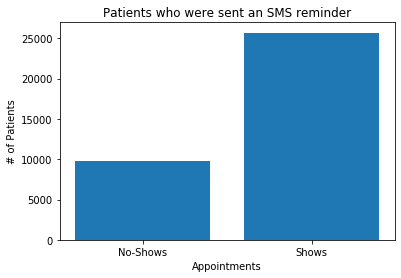

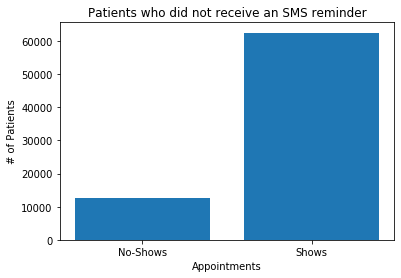

In [25]:
# Plotting the distributions
locations = [1, 2]
heights = [ns_sr_y, s_sr_y]
labels = ['No-Shows', 'Shows']
bar1 = plt.bar(locations, heights, tick_label=labels)
plt.title('Patients who were sent an SMS reminder')
plt.xlabel('Appointments')
plt.ylabel('# of Patients')
plt.show() 

locations = [1, 2]
heights = [ns_sr_n, s_sr_n]
labels = ['No-Shows', 'Shows']
bar1 = plt.bar(locations, heights, tick_label=labels)
plt.title('Patients who did not receive an SMS reminder')
plt.xlabel('Appointments')
plt.ylabel('# of Patients')
plt.show() 

In [26]:
print("Proportion of 'No-Shows' despite receiving an sms reminder were close to " + str(round((ns_sr_y/(ns_sr_y+s_sr_y)*100),2)) + "%")

Proportion of 'No-Shows' despite receiving an sms reminder were close to 27.57%


In [27]:
print("Proportion of 'Shows' despite receiving an sms reminder were close to " + str(round((s_sr_y/(ns_sr_y+s_sr_y)*100),2)) + "%")

Proportion of 'Shows' despite receiving an sms reminder were close to 72.43%


In [28]:
print("Proportion of 'No-Shows' who didn't receive an sms reminder were close to " + str(round((ns_sr_n/(ns_sr_n+s_sr_n)*100),2)) + "%")

Proportion of 'No-Shows' who didn't receive an sms reminder were close to 16.7%


In [29]:
print("Proportion of 'Shows' who didn't receive an sms reminder were close to " + str(round((s_sr_n/(ns_sr_n+s_sr_n)*100),2)) + "%")

Proportion of 'Shows' who didn't receive an sms reminder were close to 83.3%


>  Sending an SMS reminder to patients doesn't seem to increase the number of patients showing up for their appointment. 

### Research Question 3: What is the patient health designation breakdown of no-shows versus shows?

In [30]:
no_shows = df.query('no_show == "1"')
nos_by_health = no_shows.loc[(no_shows.alcoholism == 1) & (no_shows.handicap == 1) & (no_shows.hypertension == 1) & (no_shows.diabetes == 1)]
no_shows_total = nos_by_health.shape[0]

alc_nsp = (no_shows.query('alcoholism == "1"').shape[0])/no_shows_total
handicap_nsp = (no_shows.query('handicap == "1"').shape[0])/no_shows_total
hyper_nsp = (no_shows.query('hypertension == "1"').shape[0])/no_shows_total
diab_nsp = (no_shows.query('diabetes == "1"').shape[0])/no_shows_total

In [31]:
shows = df.query('no_show == "0"')
s_by_health = shows.loc[(shows.alcoholism == 1) & (shows.handicap == 1) & (shows.hypertension == 1) & (shows.diabetes == 1)]
shows_total = s_by_health.shape[0]

alc_sp = (shows.query('alcoholism == "1"').shape[0])/shows_total
handicap_sp = (shows.query('handicap == "1"').shape[0])/shows_total
hyper_sp = (shows.query('hypertension == "1"').shape[0])/shows_total
diab_sp = (shows.query('diabetes == "1"').shape[0])/shows_total

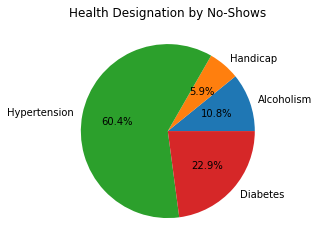

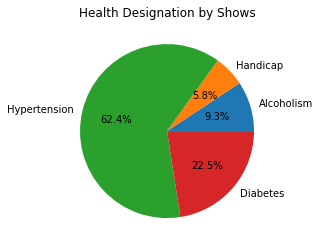

In [32]:
# Plotting the distribution
labels = ['Alcoholism', 'Handicap', 'Hypertension', 'Diabetes']
sizes = [alc_nsp, handicap_nsp, hyper_nsp, diab_nsp]
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.title('Health Designation by No-Shows')
plt.show() 

labels = ['Alcoholism', 'Handicap', 'Hypertension', 'Diabetes']
sizes = [alc_sp, handicap_sp, hyper_sp, diab_sp]
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.title('Health Designation by Shows')
plt.show() 

> Visual distribution of health designations for all shows and no-shows. None of the health condition increases or decreases the probability to show up at the appointment time. One reason could be that these health conditions are such that they might sometimes need an urgent care rather than visiting their healthcare provider on a set appointment date in the future.

### Research Question 4: Which neighborhoods have the highest number of no-shows?

In [33]:
no_shows_by_nbrhood = no_shows.groupby("neighborhood")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)
no_shows_by_nbrhood.head(10)

,neighborhood,count
38,JARDIM CAMBURI,1465
43,MARIA ORTIZ,1219
36,ITARARÉ,923
58,RESISTÊNCIA,906
10,CENTRO,703
40,JESUS DE NAZARETH,696
39,JARDIM DA PENHA,631
9,CARATOÍRA,591
77,TABUAZEIRO,573
8,BONFIM,550


> "JARDIM CAMBURI" neighbourhood had more number of "No-Shows"

### Research Question 5: Do appointment no-shows occur on specific days of the week?

In [34]:
# Data to plot

nos_mon = no_shows.query('appointment_dow == "Monday"')
nos_mon = nos_mon['appointment_dow'].count()

nos_tue = no_shows.query('appointment_dow == "Tuesday"')
nos_tue = nos_tue['appointment_dow'].count()

nos_wed = no_shows.query('appointment_dow == "Wednesday"')
nos_wed = nos_wed['appointment_dow'].count()

nos_thu = no_shows.query('appointment_dow == "Thursday"')
nos_thu = nos_thu['appointment_dow'].count()

nos_fri = no_shows.query('appointment_dow == "Friday"')
nos_fri = nos_fri['appointment_dow'].count()

nos_sat = no_shows.query('appointment_dow == "Saturday"')
nos_sat = nos_sat['appointment_dow'].count()

nos_sun = no_shows.query('appointment_dow == "Sunday"')
nos_sun = nos_sun['appointment_dow'].count()

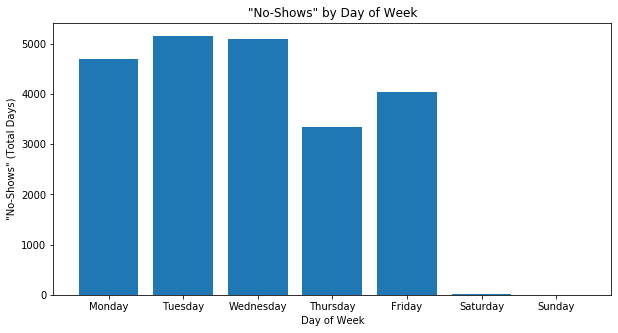

In [35]:
# The plot

locations = [1, 2, 3, 4, 5, 6, 7]
heights = [nos_mon, nos_tue, nos_wed, nos_thu, nos_fri, nos_sat, nos_sun]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.bar(locations, heights, tick_label=labels)
plt.title('"No-Shows" by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('"No-Shows" (Total Days)')

fig = plt.gcf()
fig.set_size_inches(10,5);

> Weekdays had more number of "No-Shows" compared to on weekends, especially during first 3 days of the week.

<a id='conclusions'></a>
## Conclusions

Nearly 80% of all appointments investigated were no-shows. This number was the root driver of the analysis. The following conclusions were drawn to serve as a basis for a more robust analysis in the future.

#### Findings and Future recommendations:

_What is the breakdown of no-shows versus shows by patients that received SMS reminders_

* Sending an SMS reminder to patients doesn't seem to increase the number of patients showing up for their appointment. But it would be worth performing additional regression analysis to understand how strong this correlation is.

_What is the patient health designation breakdown of no-shows versus shows_

* None of the health condition increases or decreases the probability to show up at the appointment time. One reason could be that these health conditions are such that they might sometimes need an urgent care rather than visiting their healthcare provider on a set appointment date in the future.

_Which neighborhoods have the highest number of no-shows_

* "JARDIM CAMBURI" neighbourhood had more number of "No-Shows". It would be worth analyzing further on how this neighbourhood is making sure patients turn up for their appointments.

_Do appointment no-shows occur on specific days of the week_

* Weekdays had more number of "No-Shows" compared to on weekends, especially during first 3 days of the week. It's difficult to draw any conclusions from this but could be run through a regression analysis to better understand which other show rate influencer day of week correlates with.

#### Limitations:

* Data for a longer timeframe could provide insight into how seasonality and holidays impact show rates.

* Combining external data sources such as traffic, weather, or geographic data with this dataset could put in light some of the other factors that influence patients to not show up.

* Further analysis of patients with repeat no-shows could also bring in some other information which influence them to repeatedly miss their appointments